Importing necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


/home/nitesh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Reading the training and testing csv file from kaggle.com (Titanic- Machine Learning From Disaster)

In [2]:
df_train = pd.read_csv("/home/nitesh/Downloads/titanic_dataset/train.csv")
df_test = pd.read_csv("/home/nitesh/Downloads/titanic_dataset/test.csv")

Displaying first five features of training set

In [3]:
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above code provides the descriptive statistics regarding our dataset. Using this describe() pandas function,
we can check the statistics. For instance, we can say that the maximum fare somebody provided to be in Titanic is
512 while the min is only 0.0. Similarly, we can give various insight using describe() function

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, using isnull() function, we can see that the Age and Cabin feature got null values.
We can observe that the Cabin properties has got around 80% null values, we can may drop this feature.

In [12]:
df_train.duplicated().sum()

0

This above code shows that we don't have any duplicate values

<Axes: >

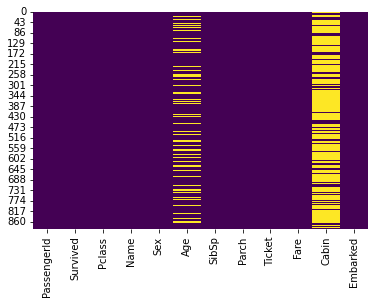

In [13]:
sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis')


In [14]:
df_train.info()

### Here we can see the data column with various data-types, memory usage, and total number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Analysis

In [47]:
df_train['Age'][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [48]:
df_train["Age"].isna().sum()


177

Here, we conclude that the age feature contain 177 null values in it. Let's dive more into the age feature and 
check how we can fill the feature null values.

In [49]:
# let's perform univariate analysis with numerical feature first. PassengerId does not play a signicant role,
# so, we only perform on Age and Fare

df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

This conclude that the average age of a person traveling in titanic is almost 30 year old. 
The youngest one is only 4 month old and the oldest person traveling in the titanic is 80 year old.

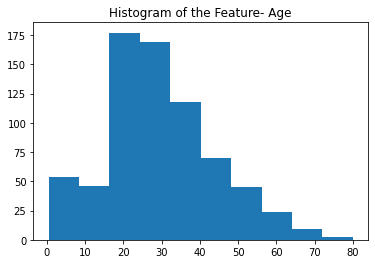

In [50]:
plt.hist(df_train['Age'])
plt.title('Histogram of the Feature- Age')
plt.show()

<Axes: >

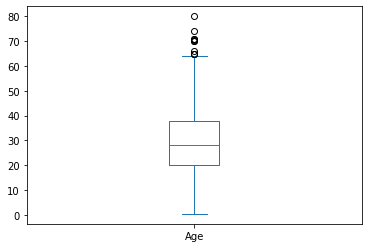

In [51]:
# Boxplot helps to show the outlier in the data
df_train['Age'].plot(kind='box')

As per our boxplot the age above maybe 65 are outlier,
let's dive more into the data whether they are the real values or the outliers.

In [52]:
df_train[df_train['Age'] > 65]
# Here, the data shows that the age is relevent and we can conclude the age upto 80 years are traveling in titanic.
# We can further conclude the survival score as per the age bivariate analysis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
